In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
matrix = np.load('../../../data/matrix.npy')

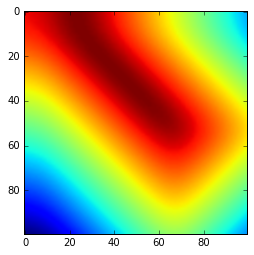

In [3]:
plt.imshow(matrix)

array([[-11.08511685, -11.02844845, -10.85224585, -10.5402593 ,
        -10.09368514,  -9.7147056 , -10.01344039, -10.83052088,
        -11.62542308, -12.29578855],
       [-10.73884143, -10.6822395 , -10.50628747, -10.19495807,
         -9.75011423,  -9.37459252,  -9.67374576, -10.48820721,
        -11.28148651, -11.95102791],
       [-10.53640687, -10.4798714 , -10.30416985,  -9.99349675,
         -9.55037688,  -9.17828255,  -9.47784897, -10.28971877,
        -11.08138534, -11.75010584],
       [-10.39286365, -10.33639463, -10.16094346,  -9.85092582,
         -9.40952362,  -9.04082664,  -9.34080105, -10.15010616,
        -10.94017008, -11.60807283],
       [-10.28158952, -10.22518694, -10.04998606,  -9.74062303,
         -9.30093222,  -8.93560299,  -9.23598029, -10.04274724,
        -10.83121849, -11.49830662],
       [-10.1907262 , -10.13439007,  -9.95943938,  -9.65073012,
         -9.21274447,  -8.85075376,  -9.15152898,  -9.95578387,
        -10.74267235, -11.40894896],
       [-1

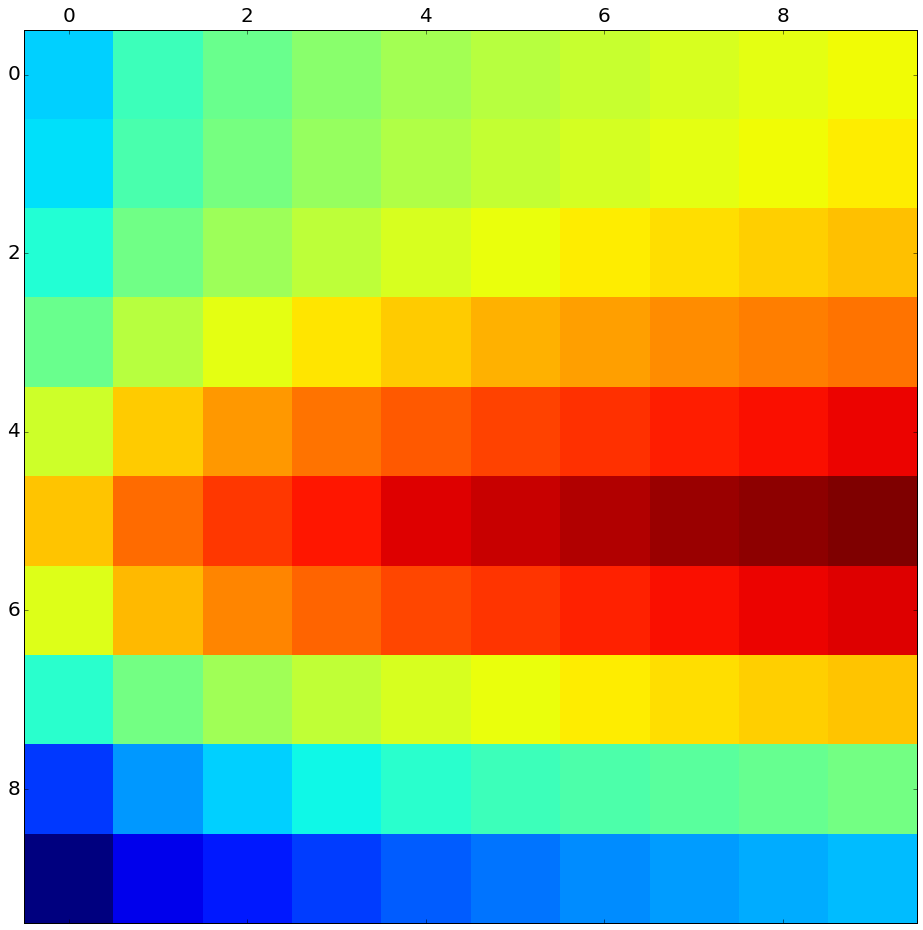

In [29]:
x = np.random.randn(200)

#x = np.zeros(200), x[:,0]*x[:,1]#np.array([x[:,0], x[:,0]**2]).T


y = x**2+np.random.randn(200)*0.01
# = x[:,0] + x[:,1]*1000+np.random.randn(200)*0.1 
#np.random.randn(200)#np.sin(x[:,0]) + np.cos(x[:,1])#
matrix = np.zeros((10, 10))
best = -999999999
bestij = None
for a1 in xrange( 0, 10):
    for w in xrange(0, 10):
        
        A = (a1+1)*1.0/10#*[a1,a2]
        H = A + np.dot(x.T, x)
      
        #w = np.dot(np.dot(np.linalg.inv(H),x.T), y)
       
        
        
        pred = np.dot(x,(w*w-25)*1.0/10)
        
        err = np.dot((pred-y), (pred-y)) + np.dot(np.dot(w, A), w)
       
        det_h = H# (np.linalg.det(np.linalg.inv(H)))
        total =  np.log(A)*0.5 -np.log(err) + np.log(det_h) * (-0.5)
        #print np.linalg.det(A)**(0.5), err, det_h_inv
        matrix[a1 , w ] = total
        best = max(best, total)
        
plt.matshow(matrix.T)
matrix

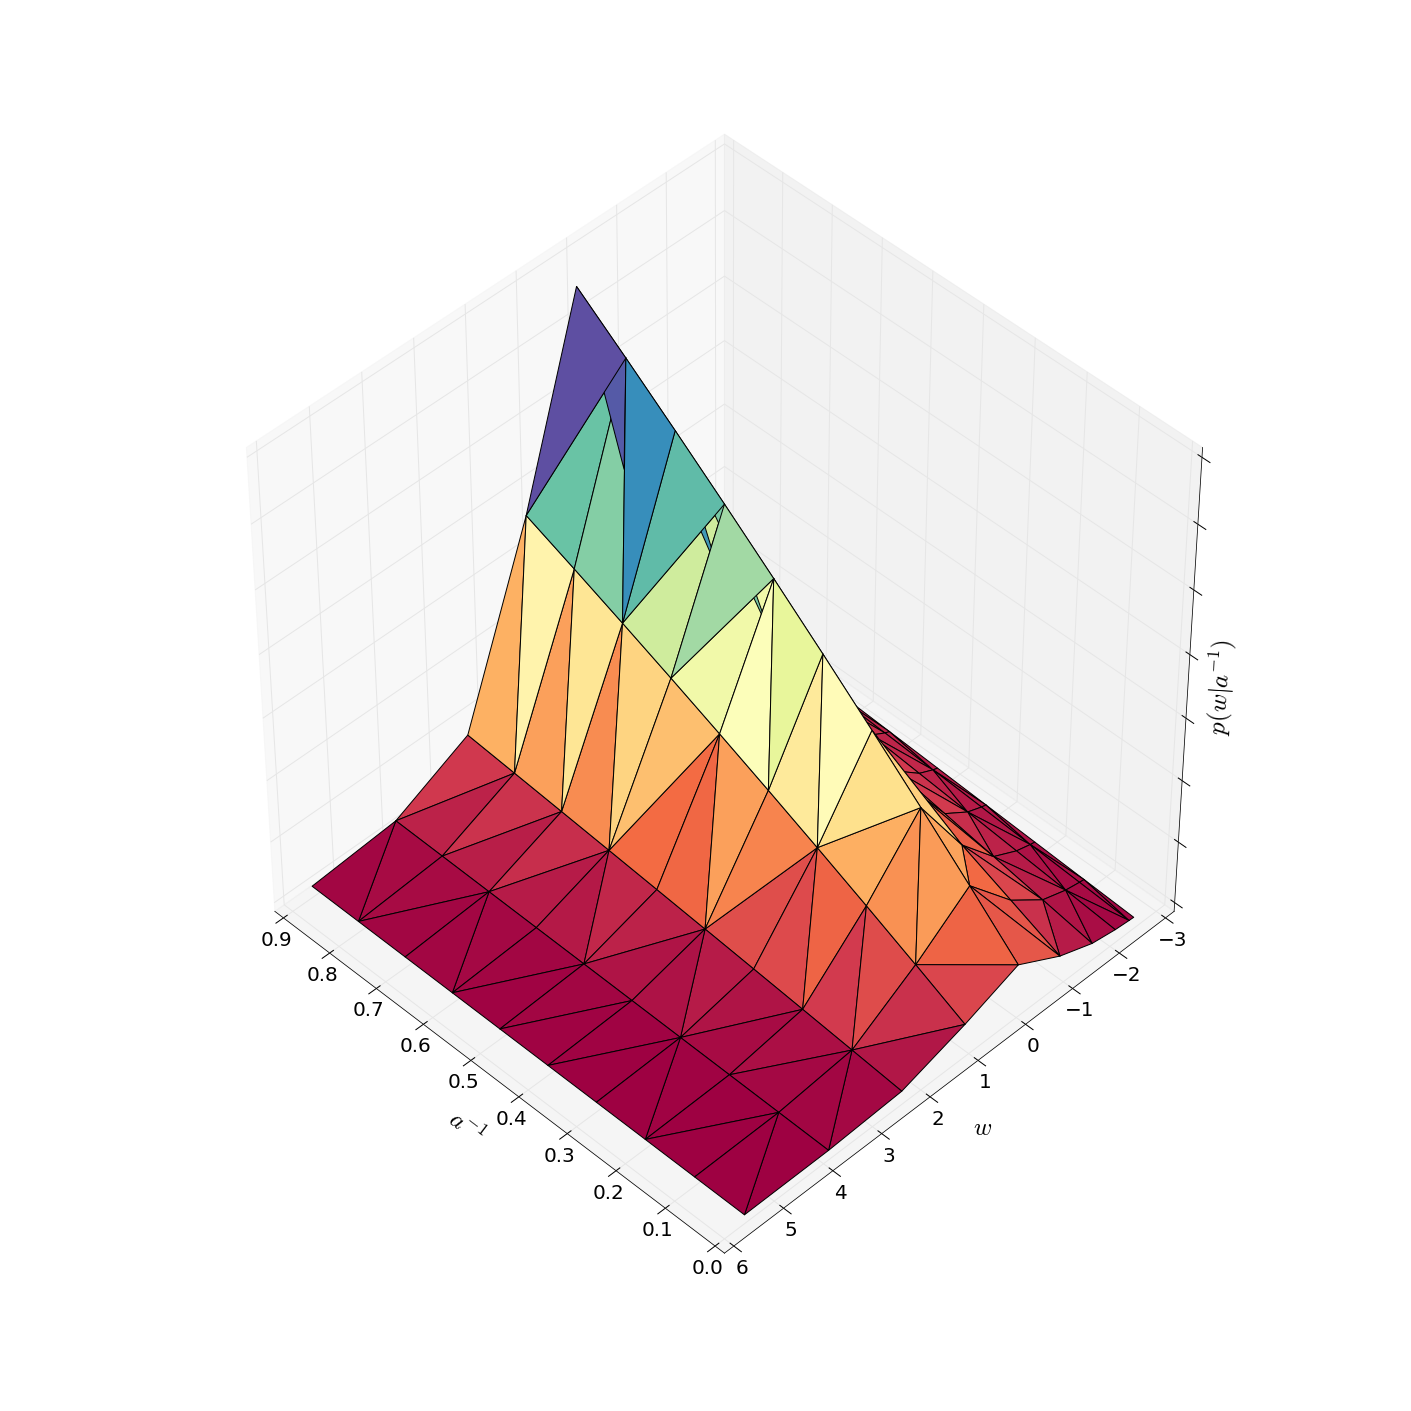

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 20
ax = fig.add_subplot(111, projection='3d')
x, y = [], []
for a1 in xrange( 0, 10):
    for w in xrange(0, 10):
        
        A = a1*1.0/10#*[a1,a2]
        W = (w*w-25)*1.0/10
        x.append(A)
        y.append(W)
#x,y= np.meshgrid(x,y)
ax.plot_trisurf(x, y, np.exp(matrix.flatten()*2),  cmap=plt.cm.Spectral, shade=True)#cmap=plt.cm.Spectral)#array = matrix.flatten())
ax.view_init(45,135)
plt.xlabel(u'$a^{-1}$', fontsize=25, linespacing=115, labelpad=25)
plt.ylabel(u'$w$',  fontsize=25, linespacing=115, labelpad = 25)
ax.set_zlabel('$p(w|a^{-1})$', fontsize=25)
ax.xaxis._axinfo['label']['space_factor'] = 112.0
ax.yaxis._axinfo['label']['space_factor'] = 122.0
#ax.zaxis._axinfo['label']['space_factor'] = 12.0
ax.dist= 12
plt.tight_layout()
plt.tick_params(
    axis='z',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
ax.set_zticklabels(['']*10)
#plt.imsave()
plt.savefig('../../../doc/slide_plots/hyper.png')